In [182]:
import tensorflow as tf  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [183]:
import keras

In [184]:
import glob

In [185]:
train_files=glob.glob("C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/train/*/**")

In [186]:
train_files

['C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/train\\NORMAL\\IM-0115-0001.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/train\\NORMAL\\IM-0117-0001.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/train\\NORMAL\\IM-0119-0001.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/train\\NORMAL\\IM-0122-0001.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/train\\NORMAL\\IM-0125-0001.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/train\\NORMAL\\IM-0127-0001.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/train\\NORMAL\\IM-0128-0001.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/train\\NORMAL\\IM-0129-0001.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/train\\NORMAL\\IM-0131-0001.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/train\\NORMAL\\IM-0133-0001.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/train\\NORMAL\\IM-0135-0001.jpeg',
 'C:/Users/HP/Dropbox

In [187]:
len(train_files)

5216

In [188]:
from random import shuffle
shuffle(train_files)
train_files

['C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/train\\PNEUMO\\person1200_virus_2042.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/train\\NORMAL\\IM-0628-0001.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/train\\NORMAL\\IM-0590-0001.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/train\\NORMAL\\NORMAL2-IM-1094-0001-0001.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/train\\PNEUMO\\person305_bacteria_1436.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/train\\PNEUMO\\person503_bacteria_2125.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/train\\PNEUMO\\person755_virus_1382.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/train\\PNEUMO\\person1588_virus_2762.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/train\\PNEUMO\\person1044_virus_1740.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/train\\PNEUMO\\person480_bacteria_2039.jpeg',
 'C:/Users/HP/Dropbox/PC/Down

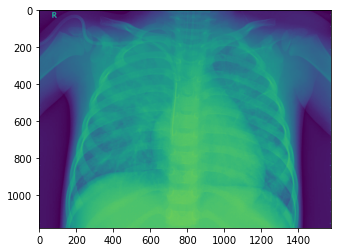

In [189]:
from PIL import Image
img=Image.open(train_files[0])
plt.imshow(img)

In [190]:
np.array(img).shape

(1176, 1576)

In [191]:
import re
def index(s,ch):
    a=[]
    for m in re.finditer(ch,s):
        a.append(m.start())
    return a

In [192]:
for i, trf in enumerate(train_files):
    idx=index(trf,'_')
    if(trf[idx[-1]+1=='b']):
        tk=[trf,1]
    else:
        tk=[trf,2]
        train_files.append(tk)

In [ ]:
X_train=np.zeros((len(train_files),128,128))
Y_train=np.zeros((len(train_files),1))
for i, fi in enumerate(train_files):
    im=Image.open(fi)
    np.array(im).reshape
    im=im.resize((128,128))
X_train[i,:,:]=np.array(im)
Y_train[i]=   fi[-6]

In [ ]:
Y_train[0]

In [ ]:
X_train/255.0

In [ ]:
model= keras.Sequential([
    keras.layers.Conv2D(
    filters=120,
    kernel_size=3,
    activation='relu',
    input_shape=(128,128,1)
    ),
    keras.layers.Conv2D(
    filters=24,
    kernel_size=3,
    activation='relu',
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=96,
        activation='relu',
    ),
    keras.layers.Dense(6,activation='softmax')

])

In [ ]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),strides=2,padding='Same',activation='relu',input_shape
    =(128, 128, 1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.3)) #here added dropout
model.add(keras.layers.Conv2D(64,(3,3), strides=1,padding= 'Same', activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(128,(3,3), strides=1,padding= 'Same', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(256,(3,3), strides=1,padding= 'Same', activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(512, activation = "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation = "softmax"))

In [116]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [117]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 120)     1200      
                                                                 
 conv2d_10 (Conv2D)          (None, 124, 124, 24)      25944     
                                                                 
 flatten_16 (Flatten)        (None, 369024)            0         
                                                                 
 dense_6 (Dense)             (None, 96)                35426400  
                                                                 
 dense_7 (Dense)             (None, 6)                 582       
                                                                 
Total params: 35,454,126
Trainable params: 35,454,126
Non-trainable params: 0
_________________________________________________________________


In [118]:
X_train.shape

(5216, 128, 128)

In [119]:
X_train=X_train.reshape(len(X_train),128,128,1)
Y_train.shape

(5216, 1)

In [120]:
X_train.shape

(5216, 128, 128, 1)

In [121]:
model.fit(X_train, Y_train,epochs=2,validation_split=0.1)

Epoch 1/2
147/147 [==============================] - 378s 3s/step - loss: 1.6731 - accuracy: 1.0000 - val_loss: 1.5526 - val_accuracy: 1.0000
Epoch 2/2
147/147 [==============================] - 393s 3s/step - loss: 1.4468 - accuracy: 1.0000 - val_loss: 1.3372 - val_accuracy: 1.0000


In [126]:
test=glob.glob("C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/test/*/**")

In [127]:
test

['C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/test\\NORMAL\\IM-0001-0001.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/test\\NORMAL\\IM-0003-0001.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/test\\NORMAL\\IM-0005-0001.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/test\\NORMAL\\IM-0006-0001.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/test\\NORMAL\\IM-0007-0001.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/test\\NORMAL\\IM-0009-0001.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/test\\NORMAL\\IM-0010-0001.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/test\\NORMAL\\IM-0011-0001-0001.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/test\\NORMAL\\IM-0011-0001-0002.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/test\\NORMAL\\IM-0011-0001.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/test\\NORMAL\\IM-0013-0001.jpeg',
 'C:/Users/HP/Dropbox/

In [128]:
len(test)

624

In [129]:
from random import shuffle
shuffle(test)
test

['C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/test\\PNEUMO\\person1665_virus_2878.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/test\\NORMAL\\NORMAL2-IM-0380-0001.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/test\\PNEUMO\\person94_bacteria_456.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/test\\PNEUMO\\person125_bacteria_594.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/test\\PNEUMO\\person152_bacteria_720.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/test\\PNEUMO\\person134_bacteria_641.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/test\\PNEUMO\\person78_bacteria_380.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/test\\NORMAL\\NORMAL2-IM-0351-0001.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/test\\PNEUMO\\person82_bacteria_405.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/archive/chest_xray/test\\NORMAL\\IM-0006-0001.jpeg',
 'C:/Users/HP/Dropbox/PC/Downloads/arc

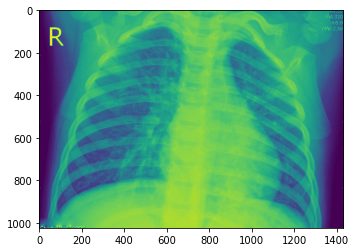

In [130]:
from PIL import Image
img=Image.open(test[0])
plt.imshow(img)

In [131]:
np.array(img).shape

(1024, 1432)

In [132]:
X_test=np.zeros((len(test),128,128),dtype='uint8')
Y_test=np.zeros((len(test),1))

In [167]:
import cv2

In [181]:
for i, trf in enumerate(test):
    im=cv2.imread(trf,0)
    if(type(im)==type(None)):
        pass
    else:
        imconv=cv2.resize(im,(128,128),interpolation=cv2.INTER_AREA)
    X_test[i,:,:]=imconv

In [159]:
prediction=model.predict(
    X_test,
    batch_size=None,
    verbose=0,
    steps=None,
    callbacks=None,
    max_queue_size= 10,
    workers=1,
    use_multiprocessing=False
)

In [170]:
prediction.shape

(624, 6)